In [22]:
import numpy as np
import matplotlib.pyplot as plt
import spaudiopy as spa
from pathlib import Path
import glob

In [23]:
# INPUT

# defining Parameters
N_sph = 3 # Ambisonics order
fs = 44100 #??

# input signal
file_path = '/Users/viautopia/Nextcloud/Applied Acoustics/A10p/HOA/' 

In [24]:
# loading signal 
in_path = glob.glob(file_path + '*.wav')
in_file= spa.io.load_audio(in_path, fs)
in_sig = in_file.get_signals()

in_sig = in_sig[0:(N_sph+1)**2,:]

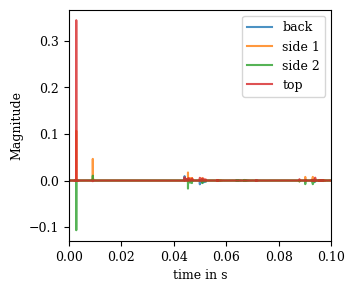

In [30]:
# defining steering directions of the beampattern
vec = np.array([[0,0,1],[1,0,0],[0,-1,0],[0,1,0],[-1,0,0],[0,0,-1]]) #top, front, left, right, back, bottom

# conversion of vec: [x,y,z] to dir: [azi, zen]
dirs = spa.utils.vec2dir(vec) 

azi_steer = dirs[:,0]
zen_steer = dirs[:,1]

w_nm = spa.parsa.sh_beamformer_from_pattern('hypercardioid', N_sph,
                                          azi_steer, zen_steer)
x_nm = in_sig
y = spa.parsa.sh_beamform(w_nm, x_nm)

t = np.arange(len(y[0,:]))/fs

#back, left, right, top
fig, ax = plt.subplots()
ax.plot(t, y[4,:], label = 'back', alpha=0.8)
ax.plot(t, y[2,:], label = 'side 1', alpha= 0.8)
ax.plot(t, y[3,:], label = 'side 2', alpha=0.8)
ax.plot(t, y[0,:], label = 'top', alpha=0.8)

plt.xlim(0,0.1)
plt.xlabel('time in s')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

In [31]:
# find sample with max amplitude for IR start
#max_sample = np.max(in_sig, axis= 1)
#idx_max_sample = np.argmax(in_sig, axis = 1)
#values, counts = np.unique(idx_max_sample, return_counts = True)

#ind_max_sample = values[counts.argmax()]
#IR_start = ind_max_sample

IR_start = 0

start_sample = 15e-3*fs + IR_start
duration = 100e-3*fs
end_sample = start_sample + duration

y_cutted = y[:,round(start_sample):round(end_sample)]

#back, left, right, top

top = np.sum(y_cutted[0,:])
left = np.sum(y_cutted[2,:])
right = np.sum(y_cutted[3,:])
back = np.sum(y_cutted[4,:])

In [32]:
# von Linus

# Beschreibung des Parameters

# TS - Top/Sides(left,right)

TS = 10*np.log10((top)**2/(left + right)**2)
print('TS = ' + str(TS))

# TH - Top/Horizontal(left,right,back)

TH = 10*np.log10((top)**2/(left + right + back)**2)
print('TH = ' + str(TH))

TS = 18.16643497909508
TH = 19.38641837687364


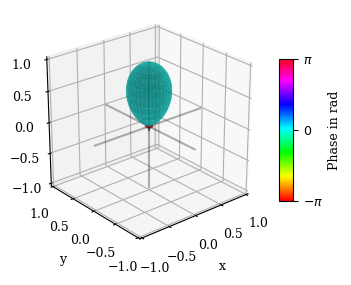

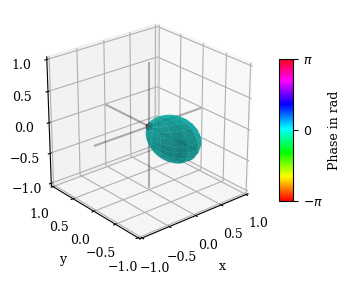

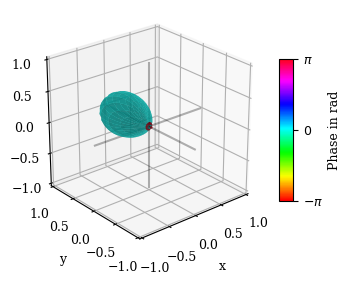

In [28]:
# Publication stuff
default_figsize = (3.39, 3.0)
plt.rcParams['figure.figsize'] = default_figsize
font = {'family' : 'serif',
        'size'   : 9}
plt.rc('font', **font)
plt.rcParams['axes.titlesize'] = 9

N_sph = 3
shtype = 'real'

ENREC = True  # amplitude or energy reconstruction
pattern = "maxRE"

#steering direction
vec_s = np.array([[0,-1,0],[0,1,0]]) #sides
vec_t = np.array([0,0,1]) #top


# conversion of vec: [x,y,z] to dir: [azi, zen]
dirs_s = spa.utils.vec2dir(vec_s) 
dirs_t = spa.utils.vec2dir(vec_t) 

azi_steer_s = dirs_s[:,0]
zen_steer_s = dirs_s[:,1]

azi_steer_t = dirs_t[0]
zen_steer_t = dirs_t[1]

# plot of Beamformer
w_nm_t = spa.parsa.sh_beamformer_from_pattern(pattern, N_sph,
                                            azi_steer_t, zen_steer_t)

w_nm_s = spa.parsa.sh_beamformer_from_pattern(pattern, N_sph,
                                            azi_steer_s, zen_steer_s)



spa.plot.sh_coeffs(w_nm_t)
spa.plot.sh_coeffs(w_nm_s[0,:])
spa.plot.sh_coeffs(w_nm_s[1,:])




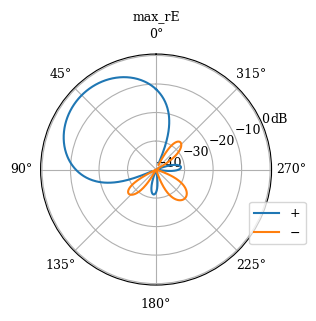

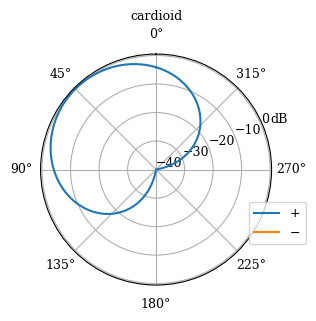

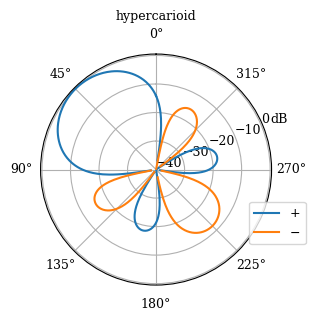

In [29]:
# defining dirac
dirac_azi = np.deg2rad(45)
dirac_zen = np.deg2rad(45)

azi = np.linspace(0, 2 * np.pi, 720, endpoint=True)

# Bandlimited Dirac pulse, with max r_E tapering window

w_n = spa.sph.max_rE_weights(N_sph)
#w_n = spa.sph.unity_gain(w_n)
dirac_tapered = spa.sph.bandlimited_dirac(N_sph, azi - dirac_azi, w_n=w_n)

spa.plot.polar(azi, dirac_tapered, title = "max_rE")

w_n = spa.sph.cardioid_modal_weights(N_sph)
#w_n = spa.sph.unity_gain(w_n)
dirac_tapered = spa.sph.bandlimited_dirac(N_sph, azi - dirac_azi, w_n=w_n)

spa.plot.polar(azi, dirac_tapered, title = "cardioid")

w_n = spa.sph.hypercardioid_modal_weights(N_sph)
#w_n = spa.sph.unity_gain(w_n)
dirac_tapered = spa.sph.bandlimited_dirac(N_sph, azi - dirac_azi, w_n=w_n)

spa.plot.polar(azi, dirac_tapered, title = "hypercarioid")